# Import Modules and read in data

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/3005330')

## Add age column

In [4]:
df['age'] = datetime.datetime.now().year - df['year_born'].astype(int)

## Filter outliers (person younger than 0 or older than 100)

In [5]:
df = df[(df['age'] >= 0) & (df['age'] <= 100)]

## Select columns of interest

In [6]:
df_subset = df[["Sex","age"]]
df_subset.head()

,Sex,age
0,Male,24
1,Female,19
2,Male,56
3,Male,23
4,Male,28


## Compute statistics

In [7]:
mn  = df_subset.groupby('Sex')['age'].mean() 
sd  = df_subset.groupby('Sex')['age'].std()
sem = df_subset.groupby('Sex')['age'].sem()

Stats = pd.concat([mn, sd,sem], axis=1)
Stats.columns = ['MEAN','SD','SEM']
Stats

,MEAN,SD,SEM
Sex,,,
Female,25.807692,9.163114,0.898517
Male,29.257143,12.708814,0.960696


## Two df for women and men

In [8]:
##DF for women and men
Male   = df_subset[df_subset['Sex']=='Male']
Female = df_subset[df_subset['Sex']=='Female']

## Boxplot: Displayed are median, 1st and 3rd quartile, range and outliers. 

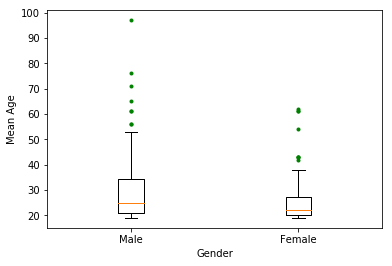

In [9]:
plt.boxplot([Male['age'] , Female['age']],0,'g.')
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.xticks([1, 2], ['Male', 'Female'])
plt.show()